**Proyecto Analisis de algoritmos sobre extraccion de comentarios de publicaciones de instagram para posteriormente analizar los datos y realizar un analisis de sentimientos**

**Materia**: Analisis de algoritmos

**Profesor:** Cristhiam Daniel Campos Julca

**Integrantes:**

Kamilt Andres Bejarano Diaz

Jerson Osorio Cely

 Daniel Vargas Peña

 Laura Alexandra Rodríguez Hernández



In [ ]:
!pip install vaderSentiment
!pip install instaloader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for instaloader: filename=instaloader-4.11-py3-none-any.whl size=65967 sha256=5486793b9c5fa92779669baf68bba10e478b8d6af06635c5966ca19040e7b848
  Stored in directory: /root/.cache/pip/wheels/59/74/a0/a643055404b7f51b588926301ce74f4ad195e5d45cde82e79d
Successfully built instaloader


**Codigo para obtener los comentarios en un archivo json. Se obtiene la url, el usuario, el comentario y los likes.**

In [ ]:
import instaloader
import json
import re
import time

def extract_shortcode(instagram_url):
    pattern = r"(?:https?://)?(?:www\.)?(?:instagram\.com(?:/\w+)?/p/)([\w-]+)(?:/)?(\?.*)?$"
    match = re.match(pattern, instagram_url)

    if match:
        shortcode = match.group(1)
        return shortcode
    else:
        return "Invalid Instagram URL"

def get_post_info(short_code):
    L = instaloader.Instaloader()
    L.login("federicosan2675@gmail.com", "FEDERICO2526@")  # Cambiar por tus credenciales
    query_type = "get_post_from_shortcode"

    try:
        post = instaloader.Post.from_shortcode(L.context, short_code)
        comments = list(post.get_comments())

        post_info = {
            'url': post.url,
            'shortcode': post.shortcode,
            'owner': post.owner_username,
            'caption': post.caption,
            'likes': post.likes,
            'comments': [{
                'user': comment.owner.username,
                'text': comment.text,
                'likes': comment.likes_count,
                'timestamp': comment.created_at_utc.strftime('%Y-%m-%d %H:%M:%S')
            } for comment in comments]
        }

        return post_info

    except instaloader.exceptions.ConnectionException:
        print("Error: Connection error. Retrying...")
        time.sleep(120)
        return get_post_info(short_code)

# URL de la publicación de Instagram
instagram_url = "https://www.instagram.com/p/C7F53FtsPrS/"

# Extraer el shortcode
shortcode = extract_shortcode(instagram_url)

# Obtener información del post
post_info = get_post_info(shortcode)

# Guardar el diccionario JSON en un archivo
with open('post_info.json', 'w') as f:
    json.dump(post_info, f, indent=4)

print(f'Información del post guardada en post_info.json')

Información del post guardada en post_info.json


**codigo para saber si el comentario es negativo, positivo o neutral**

Desafio: El codigo no suele reconocer los comentarios con emojis o con palabras muy poco comunes, por lo que se sesga y clasifica los comentarios en neutro.

In [ ]:
import instaloader
import json
import re
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def extract_shortcode(instagram_url):
    pattern = r"(?:https?://)?(?:www\.)?(?:instagram\.com(?:/\w+)?/p/)([\w-]+)(?:/)?(\?.*)?$"
    match = re.match(pattern, instagram_url)

    if match:
        shortcode = match.group(1)
        return shortcode
    else:
        return "Invalid Instagram URL"

def get_post_info(short_code):
    L = instaloader.Instaloader()
    L.login("federicosan2675@gmail.com", "FEDERICO2526@")  # Cambiar por tus credenciales

    try:
        post = instaloader.Post.from_shortcode(L.context, short_code)
        comments = list(post.get_comments())

        analyzer = SentimentIntensityAnalyzer()

        post_info = {
            'url': post.url,
            'shortcode': post.shortcode,
            'owner': post.owner_username,
            'caption': post.caption,
            'likes': post.likes,
            'comments': [{
                'user': comment.owner.username,
                'text': comment.text,
                'likes': comment.likes_count,
                'timestamp': comment.created_at_utc.strftime('%Y-%m-%d %H:%M:%S'),
                'sentiment': analyzer.polarity_scores(comment.text)
            } for comment in comments]
        }

        return post_info

    except instaloader.exceptions.ConnectionException:
        print("Error: Connection error. Retrying...")
        time.sleep(120)
        return get_post_info(short_code)

# URL de la publicación de Instagram
instagram_url = "https://www.instagram.com/p/C7F53FtsPrS/"

# Extraer el shortcode
shortcode = extract_shortcode(instagram_url)

# Obtener información del post
post_info = get_post_info(shortcode)

# Guardar el diccionario JSON en un archivo
with open('post_reaccion.json', 'w') as f:
    json.dump(post_info, f, indent=4)

print(f'Información del post guardada en post_info.json')

Información del post guardada en post_info.json


**Codigo que genera un diagrama de barras**

Información del post guardada en post_grafico_barras.json


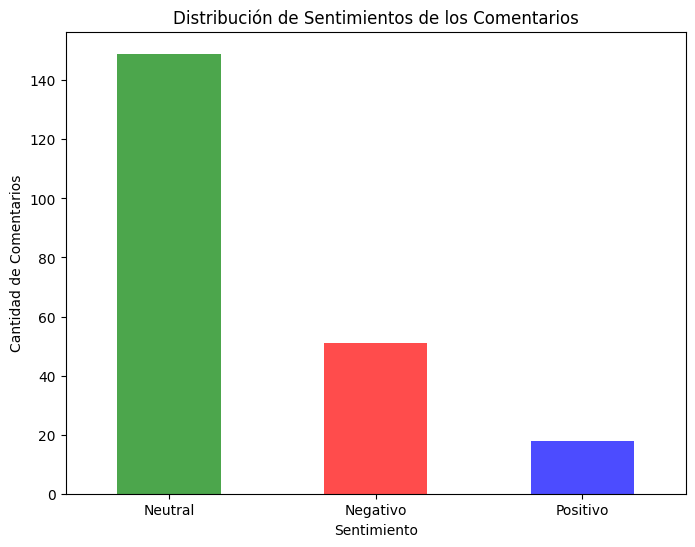

In [ ]:
import instaloader
import json
import re
import time
import matplotlib.pyplot as plt
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def extract_shortcode(instagram_url):
    pattern = r"(?:https?://)?(?:www\.)?(?:instagram\.com(?:/\w+)?/p/)([\w-]+)(?:/)?(\?.*)?$"
    match = re.match(pattern, instagram_url)

    if match:
        shortcode = match.group(1)
        return shortcode
    else:
        return "Invalid Instagram URL"

def get_post_info(short_code):
    L = instaloader.Instaloader()
    L.login("federicosan2675@gmail.com", "FEDERICO2526@")  # Cambiar por tus credenciales

    try:
        post = instaloader.Post.from_shortcode(L.context, short_code)
        comments = list(post.get_comments())

        analyzer = SentimentIntensityAnalyzer()

        post_info = {
            'url': post.url,
            'shortcode': post.shortcode,
            'owner': post.owner_username,
            'caption': post.caption,
            'likes': post.likes,
            'comments': [{
                'user': comment.owner.username,
                'text': comment.text,
                'likes': comment.likes_count,
                'timestamp': comment.created_at_utc.strftime('%Y-%m-%d %H:%M:%S'),
                'sentiment': analyzer.polarity_scores(comment.text)['compound'] # Tomar solo el puntaje de sentimiento compuesto
            } for comment in comments]
        }

        return post_info

    except instaloader.exceptions.ConnectionException:
        print("Error: Connection error. Retrying...")
        time.sleep(120)
        return get_post_info(short_code)

# URL de la publicación de Instagram
instagram_url = "https://www.instagram.com/p/C7F53FtsPrS/"

# Extraer el shortcode
shortcode = extract_shortcode(instagram_url)

# Obtener información del post
post_info = get_post_info(shortcode)

# Guardar el diccionario JSON en un archivo
with open('post_info.json', 'w') as f:
    json.dump(post_info, f, indent=4)

print(f'Información del post guardada en post_grafico_barras.json')

# Crear un DataFrame de pandas con los datos de los comentarios
comments_df = pd.DataFrame(post_info['comments'])

# Función para clasificar el sentimiento en categorías
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positivo'
    elif score <= -0.05:
        return 'Negativo'
    else:
        return 'Neutral'

# Aplicar la función de clasificación al DataFrame
comments_df['sentiment_category'] = comments_df['sentiment'].apply(classify_sentiment)

# Contar la cantidad de comentarios en cada categoría
sentiment_counts = comments_df['sentiment_category'].value_counts()

# Graficar la distribución de sentimientos
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], alpha=0.7)
plt.title('Distribución de Sentimientos de los Comentarios')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.xticks(rotation=0)
plt.show()

**Palabas mas usadas**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Palabras más frecuentes en los comentarios con más de 5 letras:
petro: 53
señor: 35
presidente: 34
colombia: 34
fuera: 25
cauca: 21
todos: 21
usted: 17
gobierno: 13
cambio: 12


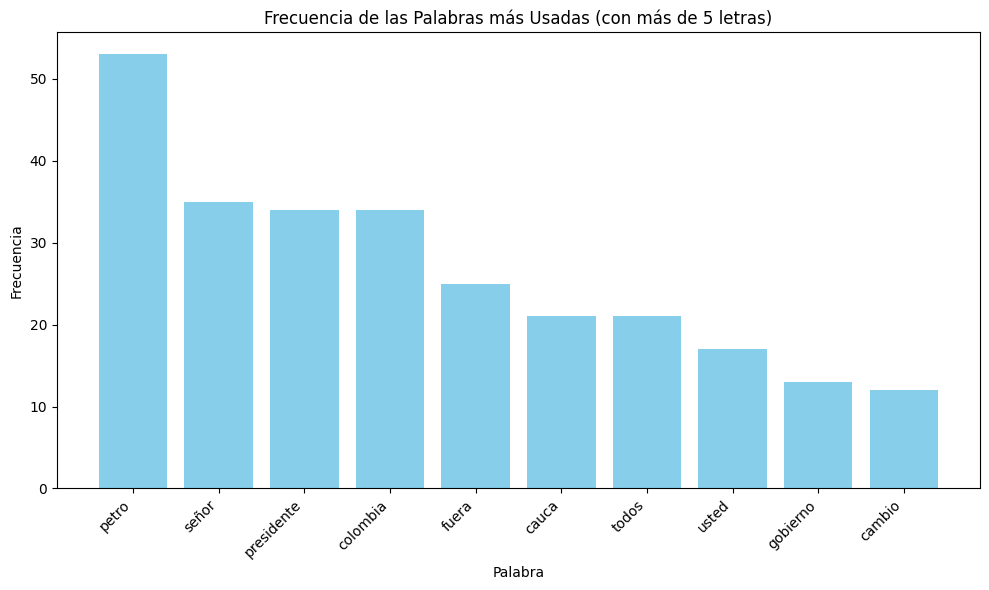

In [ ]:
import instaloader
import re
import json
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Descargar recursos necesarios para NLTK (solo si es la primera vez que se ejecuta)
nltk.download('punkt')
nltk.download('stopwords')

def extract_comments(instagram_url):
    pattern = r"(?:https?://)?(?:www\.)?(?:instagram\.com(?:/\w+)?/p/)([\w-]+)(?:/)?(\?.*)?$"
    match = re.match(pattern, instagram_url)

    if match:
        shortcode = match.group(1)
        L = instaloader.Instaloader()
        L.login("federicosan2675@gmail.com", "FEDERICO2526@")  # Cambiar por tus credenciales

        try:
            post = instaloader.Post.from_shortcode(L.context, shortcode)
            comments = list(post.get_comments())
            return comments
        except instaloader.exceptions.ConnectionException:
            print("Error: Connection error.")
            return []
    else:
        print("Invalid Instagram URL")
        return []

def get_top_words(comments, n=10):
    stop_words = set(stopwords.words('english'))
    words = []

    for comment in comments:
        text = comment.text.lower()
        tokens = word_tokenize(text)
        words.extend([word for word in tokens if word.isalnum() and len(word) >= 5 and word not in stop_words])

    word_counts = Counter(words)
    top_words = word_counts.most_common(n)
    return top_words

def plot_word_frequency(top_words):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Palabra')
    plt.ylabel('Frecuencia')
    plt.title('Frecuencia de las Palabras más Usadas (con más de 5 letras)')
    plt.tight_layout()
    plt.show()

# URL de la publicación de Instagram
instagram_url = "https://www.instagram.com/p/C7F53FtsPrS/"

# Extraer los comentarios
comments = extract_comments(instagram_url)

# Obtener las palabras más frecuentes con más de 5 letras
top_words = get_top_words(comments)

# Imprimir las palabras más frecuentes
print("Palabras más frecuentes en los comentarios con más de 5 letras:")
for word, count in top_words:
    print(f"{word}: {count}")

# Guardar las palabras en un archivo
with open('top_words_5letras.txt', 'w') as f:
    for word, _ in top_words:
        f.write(word + '\n')

# Generar gráfico de frecuencia de palabras con más de 5 letras
plot_word_frequency(top_words)